# TP : Introduction à PyTorch


PyTorch est l'une des bibliothèques de deep learning les plus utilisées aujourd'hui, tant dans la recherche que dans l'industrie. Développé par Meta AI, il se distingue par sa grande flexibilité, sa facilité d'utilisation et son mode d'exécution dynamique, qui permet de construire et d'entraîner des modèles de manière intuitive. C'est un outil incontournable pour expérimenter, prototyper et déployer des réseaux de neurones.

Dans ce TP, nous allons découvrir les concepts fondamentaux de PyTorch : la manipulation des tenseurs, l'utilisation de l'autograd pour le calcul automatique de gradients, ainsi que la construction et l'entraînement de modèles simples. L'objectif est de se familiariser avec les briques essentielles permettant de mettre en oeuvre des algorithmes d'apprentissage profond, afin de pouvoir ensuite aborder des architectures plus complexes et des projets plus avancés.

#### Import des bilbliothèques

In [74]:
import torch
import numpy as np
import random

#### Vérification du GPU et configuration du device

PyTorch peut utiliser un GPU NVIDIA pour accélérer les calculs.
torch.cuda.is_available() permet de vérifier la présence d'une carte GPU compatible.

In [75]:
# vérifier l'existance d'une GPU
torch.cuda.is_available()

# Définir le device qu'on veut utiliser
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Q1 : Quel device sera utilisé si aucun GPU n'est disponible ?

Réponse : Le CPU sera utilisé. Le code device = "cuda" if torch.cuda.is_available() else "cpu" retourne "cpu" si aucun GPU n'est disponible.

#### Création de tensors

Depuis une liste Python

In [42]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

Depuis un tableau NumPy

In [43]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

Depuis un autre tensor

In [44]:
x_ones = torch.ones_like(x_data)
x_rand = torch.rand_like(x_data, dtype=torch.float)

Avec une forme spécifique

In [45]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

Q1 : Quelle différence entre torch.tensor() et torch.from_numpy() ?
    
Réponse : torch.tensor() crée toujours une copie des données, tandis que torch.from_numpy() partage la mémoire avec le tableau NumPy d'origine. Modifier le tensor créé avec from_numpy() modifiera aussi le tableau NumPy.

In [46]:
"""Q2 : Crée un tensor 3×3 rempli de 7."""
tensor_7 = torch.full((3, 3), 7)
print(tensor_7)

tensor([[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]])


#### Attributs des tensors

In [47]:
tensor = torch.rand(4,6)
print(tensor)

print("ndim =", tensor.ndim)      # nombre de dimensions
print("shape =", tensor.shape)     # forme du tensor
print("dtype =", tensor.dtype)     # type des données
print("device =", tensor.device)    # CPU ou GPU

tensor([[0.2969, 0.8317, 0.1053, 0.2695, 0.3588, 0.1994],
        [0.5472, 0.0062, 0.9516, 0.0753, 0.8860, 0.5832],
        [0.3376, 0.8090, 0.5779, 0.9040, 0.5547, 0.3423],
        [0.6343, 0.3644, 0.7104, 0.9464, 0.7890, 0.2814]])
ndim = 2
shape = torch.Size([4, 6])
dtype = torch.float32
device = cpu


Q1 : Quelle est la dimension d'un tensor de shape (1, 3, 3) ?
    
Réponse : 3 dimensions (ndim = 3). La première dimension est le batch, les deux suivantes représentent une matrice 3×3.

#### Déplacement vers le GPU

In [48]:
if torch.cuda.is_available():
    tensor_on_gpu = tensor.to('cuda')
    tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()

Q1 : Que se passe-t-il si vous essayez tensor_on_gpu.numpy() ?

Réponse : Cela génère une erreur car NumPy ne peut pas directement accéder aux tensors sur GPU. Il faut d'abord déplacer le tensor sur CPU.

Q2 : Pourquoi faut-il copier le tensor sur le CPU avant d'appeler .numpy() ?
    
Réponse : Parce que NumPy ne supporte que les données en mémoire CPU. Les tensors GPU sont stockés dans la mémoire de la carte graphique, inaccessible directement par NumPy.

#### Indexation et slicing

In [49]:
tensor = torch.ones(4, 4)
tensor[0]       # première ligne
tensor[:, 0]    # première colonne
tensor[..., -1] # dernière colonne

tensor[:, 1] = 0

In [50]:
""" Q1 : Modifie la dernière ligne pour qu'elle contienne [9, 9, 9, 9]. """

tensor[-1] = 9
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [9., 9., 9., 9.]])


#### Concaténation de tensors

In [51]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]])


Q1 : Si tensor est un tensor de size (4,4), quelle sera la taille de t1 ?
    
Réponse : (4, 12). La concaténation se fait sur dim=1 (colonnes), donc on obtient 4 lignes et 4+4+4=12 colonnes.

#### Opérations mathématiques

Multiplication matricielle

In [52]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.matmul(tensor, tensor.T)
print(y3)

tensor([[  3.,   3.,   3.,  27.],
        [  3.,   3.,   3.,  27.],
        [  3.,   3.,   3.,  27.],
        [ 27.,  27.,  27., 324.]])


Produit élément par élément

In [53]:
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 =torch.mul(tensor, tensor)
print(z3)

tensor([[ 1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.],
        [81., 81., 81., 81.]])


Q1 : Quelle est la condition pour que deux matrices puissent être multipliées ?
    
Réponse :  Le nombre de colonnes de la première matrice doit être égal au nombre de lignes de la seconde. Pour A(m×n) @ B(p×q), il faut n = p, et le résultat sera de taille (m×q).

Opérations in-place

Ces opérations modifient directement le tensor d’origine.

In [54]:
tensor.add_(5)

tensor([[ 6.,  5.,  6.,  6.],
        [ 6.,  5.,  6.,  6.],
        [ 6.,  5.,  6.,  6.],
        [14., 14., 14., 14.]])

Q2 : Pourquoi faut-il faire attention en apprentissage automatique lorsqu'on utilise des opérations in-place ?
    
Réponse : Les opérations in-place peuvent perturber le calcul des gradients (autograd) car elles modifient les valeurs originales nécessaires à la rétropropagation. Elles peuvent causer des erreurs dans le graphe de calcul.

#### Conversion entre NumPy et PyTorch

In [55]:
t = torch.ones(5)
n = t.numpy()
t.add_(1)

tensor([2., 2., 2., 2., 2.])

Q3 : Que se passe-t-il si l'on modifie n après la conversion ?
    
Réponse:  Le tensor t sera également modifié car ils partagent la même mémoire. C'est une caractéristique de .numpy() qui crée une vue, pas une copie.

#### Manipulation des formes (reshape, view, squeeze…)

Reshape

In [56]:
x = torch.arange(1., 8.)
x_reshaped = x.reshape(1,1,7)

View (partage la mémoire)

In [57]:
z = x.view(1, 7)

Squeeze

In [58]:
x_squeezed = x_reshaped.squeeze()

Permute

In [59]:
x_permuted = x_reshaped .permute(2, 0, 1)

Q1 : Quelle est la différence entre .view() et .reshape() ?
    
Réponse : .view() nécessite que le tensor soit contigu en mémoire et retourne une vue (partage la mémoire). .reshape() peut fonctionner sur des tensors non contigus et peut créer une copie si nécessaire. .reshape() est plus flexible mais .view() est plus rapide quand applicable.

#### Indexation avancée

In [78]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x[:, 0]      # ligne 0 de la dimension 1
x[:, 1, 1]   # élément central
x[0, 0, :]   # première ligne du premier batch

tensor([1, 2, 3])

In [81]:
"""Q1 : Extraire la diagonale [1, 5, 9]"""

diagonal = torch.diagonal(x[0])
print(diagonal)

tensor([1, 5, 9])


#### Graine aléatoire (random seed)

In [82]:
torch.manual_seed(42)
random_tensor_C = torch.rand(3, 4)

Q1 : À quoi sert le random seed ?
    
Réponse : Il permet de rendre les résultats reproductibles. En fixant la graine, on obtient toujours la même séquence de nombres "aléatoires", ce qui est essentiel pour déboguer et comparer des expériences.

#### Calcul de gradients et Autograd

PyTorch possède un système automatique de différentiation appelé Autograd.
Il permet de calculer facilement les gradients, indispensables pour l'apprentissage automatique.

##### Activer le suivi des gradients : requires_grad=True

In [83]:
x = torch.tensor(2.0, requires_grad=True)
y = x**2 + 3*x + 1
y

tensor(11., grad_fn=<AddBackward0>)

##### Calcul du gradient avec .backward()

In [84]:
y.backward()
x.grad

tensor(7.)

"x.grad" contient la dérivée de y par rapport à x qui est égale à 2*x+3

Pour x=2, on devrait obtenir 7.

In [85]:
"""Q1 : Trouver le gradient de la fonction z = 5*(x**3) pour x = 1.0"""

x = torch.tensor(1.0, requires_grad=True)
z = 5 * (x**3)
z.backward()
print(x.grad)  # Devrait afficher 15.0 (dérivée = 15*x^2, donc 15*1 = 15)

tensor(15.)


##### Désactiver le suivi des gradients : with torch.no_grad()

Certaines opérations ne doivent pas suivre le calcul des gradients
(ex : évaluation d’un modèle).

In [86]:
x = torch.tensor(2.0, requires_grad=True)
y = x * 3

with torch.no_grad():
    z = y * 5

print(z.requires_grad)  # False

False


Q1 : Pourquoi ne pas calculer les gradients durant la phase de test d’un modèle ?

Réponse : Pour économiser de la mémoire et accélérer les calculs. Durant l'inférence, on n'a pas besoin de calculer les gradients puisqu'on ne met pas à jour les poids. torch.no_grad() évite de construire le graphe de calcul.

##### Retirer un tensor du graphe de calcul : .detach()

detach() crée une copie du tensor sans suivi des gradients.

In [102]:
x = torch.tensor(3.0, requires_grad=True)
y = x * 4

z = y.detach()
print(z.requires_grad)  # False

False


Q1 : Quelle différence entre detach() et with torch.no_grad() ?
    
Réponse : .detach() crée un nouveau tensor détaché du graphe de calcul, mais seulement pour ce tensor spécifique. with torch.no_grad(): désactive le suivi des gradients pour toutes les opérations dans son contexte. .detach() est pour un tensor, no_grad() est pour un bloc de code.

##### Exemple complet : descente de gradient simple

On veut minimiser la fonction : f(w) = (w−4)²

Étape 1 : Initialisation

In [103]:
w = torch.tensor(0.0, requires_grad=True)
learning_rate = 0.1

Étape 2 : Boucle d’optimisation

In [101]:
for i in range(20):
    loss = (w - 4)**2

    loss.backward()        # calcul du gradient
    with torch.no_grad():
        w -= learning_rate * w.grad  # mise à jour

    w.grad.zero_()         # remettre le gradient à zéro !

    print(f"Iteration {i+1} | w = {w.item():.4f} | loss = {loss.item():.4f}")

Iteration 1 | w = 2.7110 | loss = 12.0069
Iteration 2 | w = 2.7368 | loss = 1.6615
Iteration 3 | w = 2.7620 | loss = 1.5957
Iteration 4 | w = 2.7868 | loss = 1.5326
Iteration 5 | w = 2.8111 | loss = 1.4719
Iteration 6 | w = 2.8348 | loss = 1.4136
Iteration 7 | w = 2.8581 | loss = 1.3576
Iteration 8 | w = 2.8810 | loss = 1.3038
Iteration 9 | w = 2.9034 | loss = 1.2522
Iteration 10 | w = 2.9253 | loss = 1.2026
Iteration 11 | w = 2.9468 | loss = 1.1550
Iteration 12 | w = 2.9679 | loss = 1.1093
Iteration 13 | w = 2.9885 | loss = 1.0653
Iteration 14 | w = 3.0087 | loss = 1.0231
Iteration 15 | w = 3.0286 | loss = 0.9826
Iteration 16 | w = 3.0480 | loss = 0.9437
Iteration 17 | w = 3.0670 | loss = 0.9063
Iteration 18 | w = 3.0857 | loss = 0.8705
Iteration 19 | w = 3.1040 | loss = 0.8360
Iteration 20 | w = 3.1219 | loss = 0.8029


Q1 : Que se passe-t-il si tu ne fais pas w.grad.zero_() ?
    
Réponse : Les gradients s'accumulent à chaque itération. Le nouveau gradient s'ajoute à l'ancien au lieu de le remplacer, ce qui fausse complètement l'optimisation et empêche la convergence.

##### model.eval() : à quoi ça sert ?

model.eval() place le modèle en mode évaluation.

Cela affecte uniquement certains modules qui se comportent différemment entre :

    mode entraînement : model.train()
    mode évaluation : model.eval()

model.eval() permet de modifier le comportement :

BatchNorm

    Entrainement : utilise les statistiques du batch courant
    Évaluation : utilise les moyennes/variances stockées pendant l'apprentissage

Dropout

    Entrainement : désactive aléatoirement certains neurones
    Évaluation : aucun dropout (les neurones restent actifs à 100 %)

#### Régression linéaire avec PyTorch (sans nn.Module)

Dans cette section, on va entraîner un modèle simple : y = 3*x + 2

L'objectif est que de retrouve automatiquement les paramètres w et b.

In [104]:
# Données d'entraînement

X = torch.arange(0, 10, dtype=torch.float32).reshape(-1, 1)
y = 3 * X + 2

In [105]:
# Initialisation des paramètres du modèle (w et b)

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True )
print(w, b)

tensor([1.1103], requires_grad=True) tensor([-1.6898], requires_grad=True)


In [106]:
# Définition du modèle

def linear_model(x):
    return w * x + b

In [107]:
# Fonction de perte (MSE)

def loss_fn(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

In [108]:
# Boucle d’entraînement

learning_rate = 0.01
for epoch in range(200):
    y_pred = linear_model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()

    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Loss = {loss:.4f} | w={w.item():.3f}, b={b.item():.3f}")

# À la fin, w devrait être proche de 3 et b proche de 2.

Epoch 0 | Loss = 178.1420 | w=2.520, b=-1.446
Epoch 20 | Loss = 2.5207 | w=3.468, b=-0.934
Epoch 40 | Loss = 2.0097 | w=3.418, b=-0.620
Epoch 60 | Loss = 1.6023 | w=3.373, b=-0.339
Epoch 80 | Loss = 1.2775 | w=3.333, b=-0.089
Epoch 100 | Loss = 1.0186 | w=3.297, b=0.135
Epoch 120 | Loss = 0.8121 | w=3.266, b=0.335
Epoch 140 | Loss = 0.6475 | w=3.237, b=0.513
Epoch 160 | Loss = 0.5162 | w=3.212, b=0.672
Epoch 180 | Loss = 0.4116 | w=3.189, b=0.814


Q1 : Que se passe-t-il si on augmente le learning_rate à 1.0 ?
    
Réponse : Le modèle risque de diverger. Un taux d'apprentissage trop élevé fait des mises à jour trop importantes, dépassant le minimum et causant des oscillations ou une explosion de la perte.

#### Régression linéaire avec torch.nn

Définition du modèle

In [109]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

Fonction de perte + Optimiseur

In [110]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Boucle d’entraînement

In [111]:
for epoch in range(200):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Loss = {loss:.4f}")


Epoch 0 | Loss = 327.6701
Epoch 20 | Loss = 1.3990
Epoch 40 | Loss = 1.1154
Epoch 60 | Loss = 0.8893
Epoch 80 | Loss = 0.7090
Epoch 100 | Loss = 0.5653
Epoch 120 | Loss = 0.4507
Epoch 140 | Loss = 0.3593
Epoch 160 | Loss = 0.2865
Epoch 180 | Loss = 0.2284


In [112]:
"""Q1 : Comment accéder aux paramètres appris ?"""

for name, param in model.named_parameters():
    print(f"{name}: {param.data}")
# ou
print(model.linear.weight.data)
print(model.linear.bias.data)

linear.weight: tensor([[3.1265]])
linear.bias: tensor([1.2069])
tensor([[3.1265]])
tensor([1.2069])


In [113]:
"""Q2 : Ajouter une deuxième couche linéaire."""

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        return self.linear2(x)

#### Qu'est-ce que ça change d'ajouter une deuxième couche linéaire ?

Dans PyTorch, une couche linéaire réalise la transformation suivante :

$$\text{Linear}(x) = Wx + b$$

---

##### 1. Une seule couche linéaire

Si notre modèle contient une seule couche linéaire, alors il apprend une relation strictement linéaire :

$$\hat{y} = W_1 x + b_1$$

C'est équivalent à une régression linéaire classique. Le modèle ne peut apprendre qu'une droite.

---

##### 2. Deux couches linéaires consécutives (sans activation)

Exemple :

```python
self.linear1 = nn.Linear(1, 1)
self.linear2 = nn.Linear(1, 1)

def forward(self, x):
    x = self.linear1(x)
    x = self.linear2(x)
    return x
```
Mathématiquement :

$$\hat{y} = W_2 (W_1 x + b_1) + b_2$$
    
En développant :

$$\hat{y} =  (W_1 W_2) x + (W_2 b_1 + b_2)$$

Le modèle reste linéaire... Même si on ajoute plusieurs couches linéaires consécutives, sans activation, le résultat final est toujours une seule transformation linéaire équivalente.

##### Quand est-ce que plusieurs couches deviennent intéressantes ?

Uniquement quand on ajoute une fonction d'activation non linéaire entre les couches :

```python
self.linear1 = nn.Linear(1, 10)
self.relu = nn.ReLU()
self.linear2 = nn.Linear(10, 1)

def forward(self, x):
    return self.linear2(self.relu(self.linear1(x)))
```

Maintenant notre modèle devient :

$$\hat{y} = W_2 \sigma(W_1 x + b_1) + b_2$$

où $\sigma$ est une non-linéarité (ReLU, tanh, sigmoid…).

Le modèle n'est plus linéaire. Il peut apprendre des relations non linéaires, comme : courbes, polynômes, fonctions périodiques, données complexes…

#### Dataset & DataLoader (gestion des données)

Les DataLoader permettent de charger les données par batches, mélangées (shuffle) ou non.

Création d’un Dataset personnalisé

In [114]:
from torch.utils.data import Dataset, DataLoader

class SimpleDataset(Dataset):
    def __init__(self):
        self.X = torch.arange(0, 10, dtype=torch.float32).reshape(-1, 1)
        self.y = 3 * self.X + 2

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

Charger le Dataset dans un DataLoader

In [115]:
dataset = SimpleDataset()
loader = DataLoader(dataset, batch_size=2, shuffle=True)

Parcourir un DataLoader

In [116]:
for batch_X, batch_y in loader:
    print(batch_X, batch_y)

tensor([[0.],
        [9.]]) tensor([[ 2.],
        [29.]])
tensor([[3.],
        [7.]]) tensor([[11.],
        [23.]])
tensor([[2.],
        [5.]]) tensor([[ 8.],
        [17.]])
tensor([[6.],
        [1.]]) tensor([[20.],
        [ 5.]])
tensor([[8.],
        [4.]]) tensor([[26.],
        [14.]])


Q1 : Que fait l'argument shuffle=True ?
    
Réponse : Il mélange aléatoirement l'ordre des échantillons à chaque epoch. Cela aide à éviter que le modèle apprenne l'ordre des données et améliore la généralisation en introduisant plus de variabilité dans les batches.

#### Application sur un vrai jeu de données d'images (MNIST via torchvision)

MNIST contient des images de chiffres 28×28 = 784 pixels.

In [117]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

Fonction pour convertir les images en tenseurs et les normaliser (optionnel mais classique).

In [118]:
transform = transforms.Compose([
    transforms.ToTensor(),              # image PIL to tensor (C,H,W) entre 0 et 1
    # transforms.Normalize((0.5,), (0.5,))  # optionnel : normalisation
])

Télécharger MNIST

In [119]:
# Le dataset sera téléchargé dans le dossier "./data"

train_dataset = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.88MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 155kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.46MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.72MB/s]


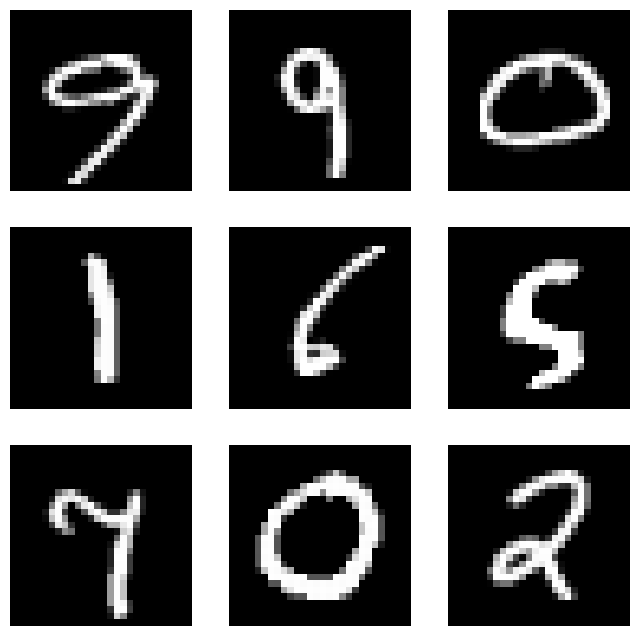

In [120]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Créer les Dataloader

In [121]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=64, shuffle=False)

### Réseaux de Neurones Profonds : MLP & CNN

Dans cette partie, nous allons créer :

    un MLP (Multi-Layer Perceptron) pour la classification de chiffres (MNIST)

    un CNN simple pour apprendre à classifier des images 1 canal (MNIST)

L'objectif est d'introduire les principales briques des architectures modernes.

#### MLP (Multi-Layer Perceptron)

Un MLP est composé uniquement de couches linéaires, séparées par des activations.

Ex :
Entrée -> Linear -> ReLU -> Linear -> ReLU -> Linear -> Sortie

In [125]:
"""Modèle MLP TODO """
"""Modèle MLP"""

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # Architecture : 784 -> 128 -> 64 -> 10
        self.layers = nn.Sequential(
            nn.Flatten(),                # Aplatir l'image 28x28 en vecteur de 784
            nn.Linear(28*28, 128),       # Première couche cachée
            nn.ReLU(),                   # Activation
            nn.Linear(128, 64),          # Deuxième couche cachée
            nn.ReLU(),                   # Activation
            nn.Linear(64, 10)            # Couche de sortie (10 classes)
        )

    def forward(self, x):
        return self.layers(x)

mlp = MLP()
print(mlp)

MLP(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
  )
)


Fonction de perte + Optimiseur

In [126]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

Exemple de la boucle d'entraînement (un seul epoch)

In [127]:
for X_batch, y_batch in train_loader:
    optimizer.zero_grad()
    y_pred = mlp(X_batch)
    loss = criterion(y_pred, y_batch)
    loss.backward()
    optimizer.step()

Q1 : Quelle activation remplace ReLU dans un MLP profond ?
    
Réponse :  Plusieurs alternatives existent : Leaky ReLU (évite les neurones morts), ELU, GELU (utilisé dans les Transformers), Swish/SiLU, ou Mish. Ces activations ont souvent de meilleures propriétés de gradient.

Exemple de code d'entrainement du modèle pour plusieurs epochs

In [128]:
"""Boucle d'entrainement pour 10 epochs"""

epochs = 10
plt_loss = []

for epoch in range(epochs):
    mlp.train()  # Mode entraînement
    epoch_loss = 0

    for X_batch, y_batch in train_loader:
        # Remettre les gradients à zéro
        optimizer.zero_grad()

        # Forward pass
        y_pred = mlp(X_batch)

        # Calcul de la loss
        loss = criterion(y_pred, y_batch)

        # Backward pass
        loss.backward()

        # Mise à jour des poids
        optimizer.step()

        # Accumuler la loss
        epoch_loss += loss.item()

    # Loss moyenne pour l'epoch
    avg_loss = epoch_loss / len(train_loader)
    plt_loss.append(avg_loss)

    print(f"Epoch [{epoch+1}/{epochs}] | Loss: {avg_loss:.4f}")

print("Entraînement terminé!")

Epoch [1/10] | Loss: 0.1421
Epoch [2/10] | Loss: 0.0966
Epoch [3/10] | Loss: 0.0736
Epoch [4/10] | Loss: 0.0557
Epoch [5/10] | Loss: 0.0458
Epoch [6/10] | Loss: 0.0378
Epoch [7/10] | Loss: 0.0311
Epoch [8/10] | Loss: 0.0249
Epoch [9/10] | Loss: 0.0214
Epoch [10/10] | Loss: 0.0187
Entraînement terminé!


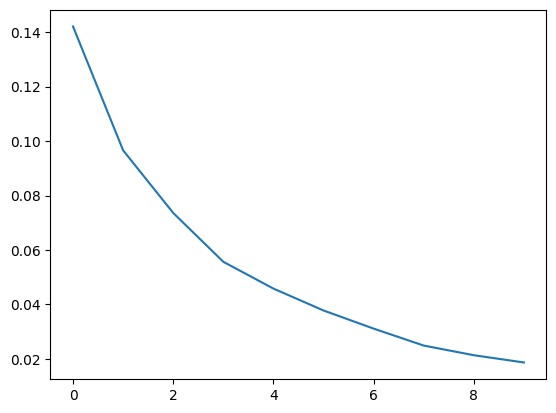

In [129]:
plt.plot(plt_loss)

Evaluation sur le jeu de test

In [136]:
mlp.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        # Forward pass
        y_pred = mlp(X_batch)

        # Prédictions
        _, predicted = torch.max(y_pred, 1)

        # Compter les bonnes prédictions
        test_total += y_batch.size(0)
        test_correct += (predicted == y_batch).sum().item()

test_acc = 100 * test_correct / test_total
print(f"Final Test Accuracy : {test_acc:.3f}%")

Final Test Accuracy : 97.990%


#### Notes:

- model.train() :
    active certaines couches comme Dropout, BatchNorm en mode entraînement.

- model.eval() :
    met le modèle en mode évaluation (pas de Dropout, BatchNorm en mode inference).

- with torch.no_grad() :
    désactive la construction du graphe de gradients (moins de mémoire, plus rapide).

- torch.max(y_pred, dim=1) :
    récupère la classe prédite.

#### NN (Convolutional Neural Network)

Les CNN sont utilisés pour traiter les images.
Ils exploitent :

    des filtres convolutifs

    des features locales

    des réductions de dimension (MaxPool)

Architecture d'un CNN simple
Schéma général :

- Entrée (1×28×28)
- Conv2d
- ReLU
- MaxPool2d
- Flatten
- Linear
- Linear
- Sortie (10 classes)

In [137]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1),  # 28x28 -> 28x28
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 28x28 -> 14x14

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),  # 14x14 -> 14x14
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # 14x14 -> 7x7
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(32 * 7 * 7, 128),  # 32 canaux * 7 * 7 = 1568
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)  # 10 classes
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # flatten
        return self.fc_layers(x)

cnn = SimpleCNN()
print(cnn)

SimpleCNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=1568, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [138]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)

In [140]:
for X_batch, y_batch in train_loader:
    optimizer.zero_grad()
    y_pred = cnn(X_batch)
    loss = criterion(y_pred, y_batch)
    loss.backward()
    optimizer.step()

Q1 : Quel est le rôle de MaxPool2d ?
    
Réponse : Réduire la dimension spatiale (downsampling) en gardant la valeur maximale dans chaque région. Cela réduit le nombre de paramètres, diminue le surapprentissage, crée une invariance à de petites translations, et extrait les features les plus saillantes.
    
Q2 : Pourquoi les CNN sont-ils plus efficaces que les MLP sur les images ?

Réponse : Les CNN exploitent la structure spatiale des images grâce à :

- Localité : les filtres convolutifs détectent des patterns locaux
- Partage de paramètres : les mêmes filtres sont appliqués partout (beaucoup moins de paramètres)
- Invariance par translation : un pattern est reconnu quelle que soit sa position
- Hiérarchie de features : des edges simples aux objets complexes

In [141]:
"""Créer un CNN avec :
    3 couches convolutives
    1 couche dense finale
    des BatchNorm entre les convolutions
"""

"""Créer un CNN avec :
    3 couches convolutives
    1 couche dense finale
    des BatchNorm entre les convolutions
"""

class AdvancedCNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layers = nn.Sequential(
            # Première couche convolutive
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),  # 1x28x28 -> 32x28x28
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 32x28x28 -> 32x14x14

            # Deuxième couche convolutive
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),  # 32x14x14 -> 64x14x14
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 64x14x14 -> 64x7x7

            # Troisième couche convolutive
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),  # 64x7x7 -> 128x7x7
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # 128x7x7 -> 128x3x3
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 3 * 3, 256),  # 128 * 3 * 3 = 1152
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)  # 10 classes de sortie
        )

    def forward(self, x):
        x = self.conv_layers(x)
        return self.fc_layers(x)

cnn_advanced = AdvancedCNN()
print(cnn_advanced)

# Vérifier les dimensions
test_input = torch.randn(1, 1, 28, 28)
output = cnn_advanced(test_input)
print(f"\nInput shape: {test_input.shape}")
print(f"Output shape: {output.shape}")

AdvancedCNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1152, out_features=256, bias=True)
    (2): ReLU()
    (3): Dr

### Exercice : Construire un Autoencodeur

Un autoencodeur est un réseau capable de :

- Encoder une donnée (image) dans un espace latent de dimension réduite.
- Décoder cette représentation latente pour reconstruire l'image d'origine.

Utilisation : débruitage, compression, détection d'anomalies, génération…


Consignes :

1. Créer une classe Autoencoder(nn.Module)

2. Implémenter :
    - un encodeur (MLP)
    - un espace latent de faible dimension (ex : 16)
    - un decodeur symétrique


3. Utiliser une loss MSE pour mesurer la qualité de reconstruction

4. Entraîner l'autoencodeur sur MNIST (train set uniquement)

5. Afficher :
    - une image originale
    - son image reconstruite


6. Tester différentes tailles de la couche latente (2, 8, 32…)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, latent_dim=16):
        super().__init__()

        ## ---- ENCODEUR ----
        self.encoder = nn.Sequential(
            # TODO: ajouter la couche latente
            ...
        )

        ## ---- DECODEUR ----
        self.decoder = nn.Sequential(
            # TODO: partir de couche latente
            ...
        )

    def forward(self, x):
        ...


model = Autoencoder(...)

# Optimiseur & loss
criterion = ...
optimizer = ...

# Boucle d'entraînement (train_loader déjà défini)
for epoch in range(...):
    model.train()
    ...